# Clustering con Python

Vamos a trabajar con el dataset de los vinos. Genialcito!
* Recuerda que para trabajar bien un dataset necesitas conocer la informacion relacionada con ese dataset. Por ejemplo con Pokemon

#### importar el dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/wine/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

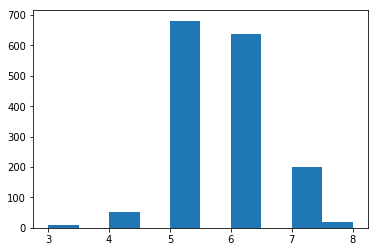

In [5]:
plt.hist(df["quality"])

entre el 60% y 70% de las muestras son de calidad entre 5 - 6. "Normales" y 7, 8 son muy buenos

In [6]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


* Parece que cuando mas "volatile acidity" es el vino peor calificacion se le pone
* El nivel de cloro tambien afecta la calidad del vino
* Mayor sulphates mejor es la calidad del vino

Otras variables como Ph, residual sugar o alcohol son muy homogeneas o por otro lado no dicen nada concreto.

**Todos estos analisis fueron posibles gracias a revisar el promedio de los valores y la "calificaicon" usando groupby**

## Normalizacion o tipificar el dataset
Tenemos "valores" o columnas que tienen datos en el rando de 0. tanto y otras rangos de 24 a 56, otras de 11 a 16, entre otras

**Debemos hacer que todas esas columnas cuenten por igual**

In [7]:
#normalizamos el dataset de manera manual
df_norm = (df-df.min())/(df.max()-df.min())#.min retorna todos los minimos del dataset

In [8]:
df.min() #ejemplo solo para ver que contiene df.min()

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [9]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


El dataset ha sido normalizado con valores entre 0 y 1. Solo asi podemos hacer correctamente un clustering

## Clustering Jerarquico con sckit-learn

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)
#numero de clusters o divisiones, metodo usado .fit(data) todos los datos ya normalizados

In [37]:
md_h = pd.Series(clus.labels_)
md_h # tiene datos de a que cluster pertenece cada dato

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Vamos a mostrar los datos de las series en un histograma

Text(0, 0.5, 'Número de vinos del cluster')

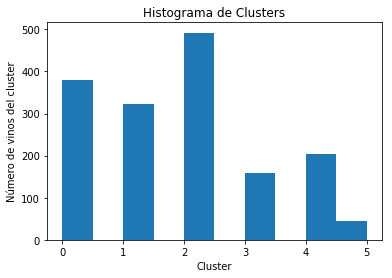

In [38]:
plt.hist(md_h)
plt.title("Histograma de Clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [24]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
Z = linkage(df_norm, "ward")#hacer el enlace

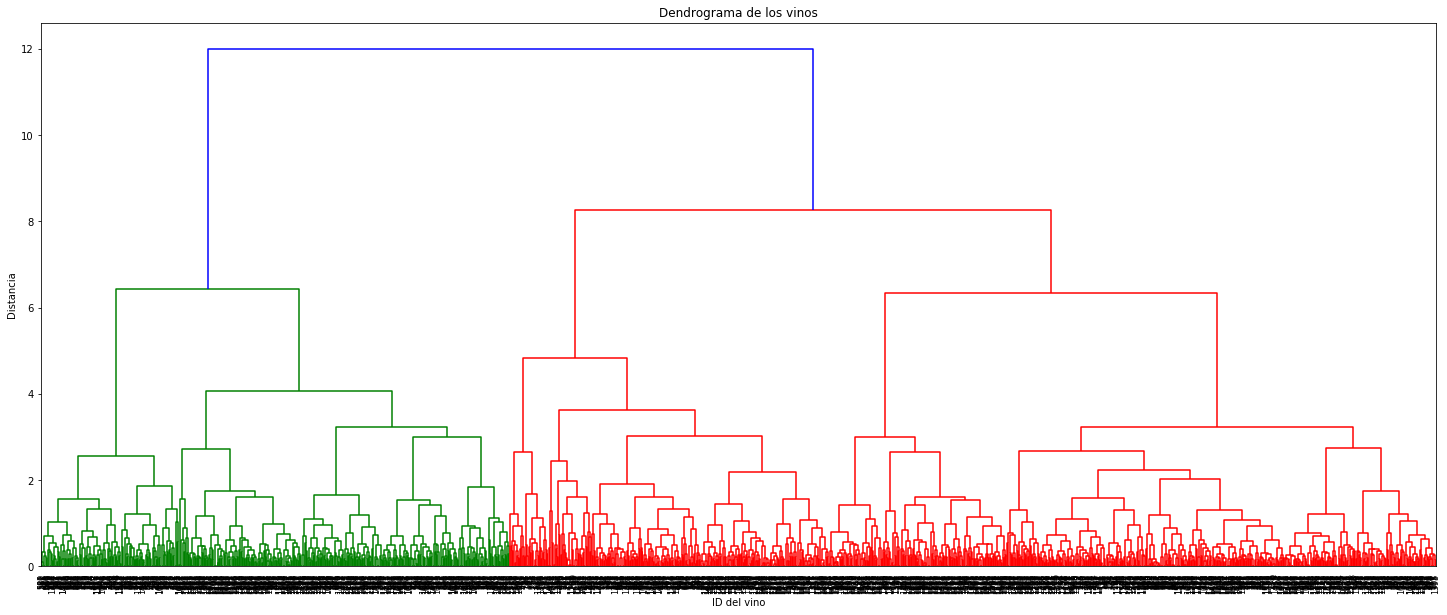

In [32]:
#hacer el dendrograma
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

## Clustering con K-means

In [34]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [35]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
model.labels_

array([3, 3, 3, ..., 4, 3, 2])

In [39]:
md_k = pd.Series(model.labels_)

In [40]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [41]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,3
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,3
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,3


Los diferentes algoritmos agruparon en cluster de diferente numero. Sin embargo todos pertenecen al mismo Cluster. _(esto es normal y no deben coincidir exactamente)_

(array([275.,   0., 227.,   0., 233.,   0., 349.,   0., 214., 301.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

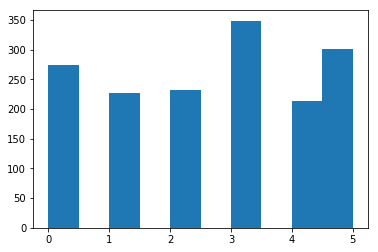

In [42]:
plt.hist(md_k)

In [43]:
model.cluster_centers_

array([[0.32196299, 0.27889166, 0.31105455, 0.16669988, 0.12894825,
        0.39897567, 0.31139094, 0.54579362, 0.42714388, 0.18983125,
        0.21620513, 0.45309091],
       [0.58882695, 0.20854203, 0.54519824, 0.13098184, 0.17456407,
        0.14537445, 0.09777245, 0.65508419, 0.31648687, 0.25323802,
        0.29350503, 0.54537445],
       [0.37057997, 0.15437415, 0.43364807, 0.1067964 , 0.10510364,
        0.16605211, 0.08400188, 0.40491136, 0.4123889 , 0.23985505,
        0.504655  , 0.71502146],
       [0.23711236, 0.38923343, 0.06707736, 0.09381992, 0.12079349,
        0.16693571, 0.10674618, 0.47956402, 0.52352052, 0.1517252 ,
        0.23541253, 0.42063037],
       [0.17260772, 0.31714889, 0.09714953, 0.09345794, 0.09465932,
        0.2525668 , 0.12705987, 0.31629201, 0.57815145, 0.18534893,
        0.50002396, 0.61495327],
       [0.3259342 , 0.27551996, 0.26162791, 0.0873117 , 0.13110999,
        0.13714847, 0.12227792, 0.51711622, 0.4227117 , 0.18606641,
        0.21535906,

In [44]:
#para ver la eficiencia del modelo
model.inertia_

188.54419801862235

## Interpretacion final
* Nuestros datos sirven para poner un precio mas o menos similar a elementos de un mismo cluster
* Podemos segmentar bien por gustos el tipo de vino y para que mercados
    * Vinos por concentracion de alcohol
    * por acidez
    * _Entre otras variables_

In [45]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.321963,0.278892,0.311055,0.166700,0.128948,0.398976,0.311391,0.545794,0.427144,0.189831,0.216205,0.453091,1.040000
1,0.588827,0.208542,0.545198,0.130982,0.174564,0.145374,0.097772,0.655084,0.316487,0.253238,0.293505,0.545374,2.480176
2,0.370580,0.154374,0.433648,0.106796,0.105104,0.166052,0.084002,0.404911,0.412389,0.239855,0.504655,0.715021,0.081545
3,0.237112,0.389233,0.067077,0.093820,0.120793,0.166936,0.106746,0.479564,0.523521,0.151725,0.235413,0.420630,2.137536
4,0.172608,0.317149,0.097150,0.093458,0.094659,0.252567,0.127060,0.316292,0.578151,0.185349,0.500024,0.614953,3.434579
5,0.325934,0.275520,0.261628,0.087312,0.131110,0.137148,0.122278,0.517116,0.422712,0.186066,0.215359,0.497010,1.551495
